In [1]:
import sklearn
import numpy
import pandas
import scipy
import re
import string
import datetime
from datetime import date

In [2]:
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer


from sklearn.model_selection import cross_val_predict, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances,roc_auc_score

from sklearn import svm, linear_model
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle
from sklearn.metrics import classification_report
from sklearn import  feature_selection
from sklearn.feature_selection import (chi2, f_classif, mutual_info_classif, SelectPercentile, SelectKBest, SelectFpr, SelectFdr, SelectFwe,SelectFromModel, GenericUnivariateSelect)


In [4]:
pandas.options.mode.chained_assignment = None

In [5]:
file=open('./jbap6.csv')
data=pandas.read_csv(file)

In [6]:
data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Resolution,Components,Labels,...,IntegrMess_lab,Web_lab,Server_lab,Security_lab,Testsuite_lab,LoadBalance_lab,Hornet_lab,Maven_lab,Servnet_lab,Other_lab
0,5055,0,JBPAPP6-1762,@Resource injection of Datasource on clustered...,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,Clustering,NaN,...,0,0,0,0,0,0,0,0,0,0
1,5056,1,JBPAPP6-1774,jconsole.bat fails if trying to connect to a s...,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,Scripts and Commands,NaN,...,0,0,0,0,0,0,0,0,0,0
2,5057,2,JBPAPP6-1534,Need to document how to deploy files via the H...,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,Documentation,NaN,...,0,0,0,0,0,0,0,0,0,0
3,5058,3,JBPAPP6-1290,CacheException: Unable to end batch,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,Clustering,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5059,4,JBPAPP6-1320,EJBCLIENT000028: No EJB receiver contexts avai...,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,Clustering EJB,NaN,...,0,0,0,0,0,0,0,0,0,0
5,5060,5,JBPAPP6-1403,Inconsistent way of logging messages.,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,?,eap601candidate,...,0,0,0,0,0,0,0,0,0,1
6,5061,6,JBPAPP6-1428,cli help --commands doesn't list commands,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,?,NaN,...,0,0,0,0,0,0,0,0,0,1
7,5062,7,JBPAPP6-1525,ClientSessionFactoryImpl.forceReturnChannel1 t...,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,HornetQ,NaN,...,0,0,0,0,0,0,1,0,0,0
8,5063,8,JBPAPP6-1508,Picketlink does not recognize JBoss EAP 6.0,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,PicketLink,NaN,...,0,0,0,1,0,0,0,0,0,0
9,5064,9,JBPAPP6-1526,"Can't load log handler ""java.util.logging.File...",Closed,JBoss Enterprise Application Platform 6,Minor,Migrated to another ITS,HornetQ,NaN,...,0,0,0,0,0,0,1,0,0,0


ttr
Минимум: 0  Максимум: 609  Среднее: 112.28236397748593
Attachments
Минимум: 0  Максимум: 17  Среднее: 0.2804878048780488
Comments
Минимум: 1  Максимум: 126  Среднее: 7.279549718574109


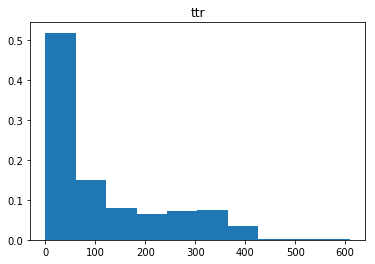

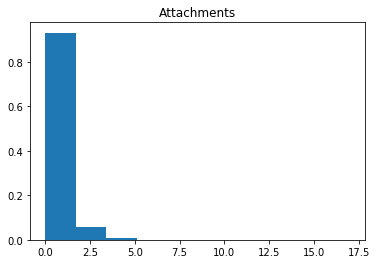

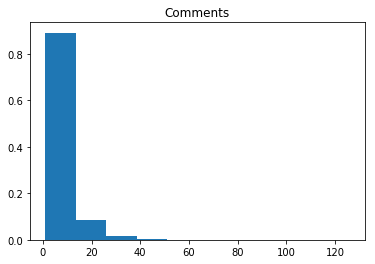

In [64]:

def infa(data, field):
    print (field)    
    print ('Минимум: ' + str(data[field].min())+ '  Максимум: ' + str(data[field].max())+'  Среднее: ' + str(data[field].mean()))
        
    plt.figure()
    btt=numpy.array(data[field])
    hist_rf=plt.hist(btt, weights=numpy.zeros_like(btt) + 1. / btt.size, bins=10)
    plt.title(field) 
    
    return

infa(data, 'ttr')
infa(data, 'Attachments')
infa(data, 'Comments')

Resolution
Cannot Reproduce             5
Deferred                     4
Done                       686
Duplicate Issue             13
Migrated to another ITS    290
Out of Date                  7
Partially Completed          2
Rejected                    29
Won't Fix                   30
Name: Issue_key, dtype: int64


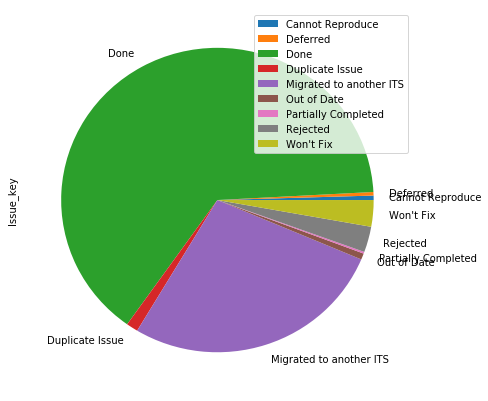

In [65]:
print(data.groupby(['Resolution'])['Issue_key'].count())
plot = data.groupby(['Resolution'])['Issue_key'].count().plot.pie(y='Status', figsize=(7, 7),  legend=True)

Priority
Blocker      72
Critical     73
Major       826
Minor        91
Optional      2
Trivial       2
Name: Issue_key, dtype: int64


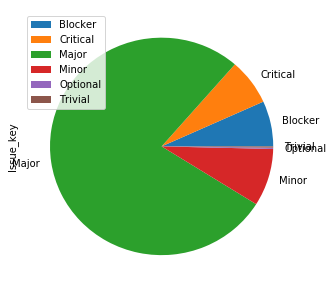

In [66]:
print(data.groupby(['Priority'])['Issue_key'].count())
plot = data.groupby(['Priority'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

was_reopened
0.0    658
1.0    408
Name: Issue_key, dtype: int64


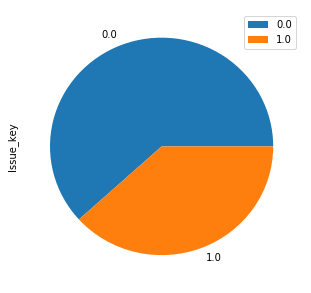

In [67]:
print(data.groupby(['was_reopened'])['Issue_key'].count())
plot = data.groupby(['was_reopened'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

In [6]:
AOT=['Builds', 'Docs', 'Clustering', 'Config', 'EJB', 'Hibernate', 'IntegrMess', 'Web', 'Server', 'Security','Testsuite', 'Hornet', 'Maven' , 'Servnet', 'Other']

In [ ]:
an={}
for i in range(len(AOT)):
    an.update({AOT[i]:data[AOT[i]+'_lab'].sum()}) 
plt.figure()
plt.xticks(range(len(an)), an.keys(),rotation=45, rotation_mode='anchor')    
plt.bar(range(len(an)), an.values(), align='center')

In [7]:
bin_data=data

bin_data=pandas.get_dummies(bin_data, prefix=['Resolution'], columns=['Resolution'])

bin_data['Priority_ord']=bin_data['Priority'].astype("category", ordered=True,categories=['Optional', 'Trivial', 'Minor', 'Major', 'Critical', 'Blocker']).cat.codes

bin_data['norm_ttr']=preprocessing.scale(bin_data['ttr'])
bin_data['norm_att']=preprocessing.scale(bin_data['Attachments'])
bin_data['norm_comm']=preprocessing.scale(bin_data['Comments'])

bin_data['Resolution_Wont Fix_new']=bin_data["Resolution_Won't Fix"]+bin_data['Resolution_Cannot Reproduce']
bin_data['Resolution_Migrated_new']=bin_data['Resolution_Migrated to another ITS']+bin_data['Resolution_Out of Date']+bin_data['Resolution_Deferred']+bin_data['Resolution_Partially Completed']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [71]:
bin_data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Components,Labels,Description,...,Resolution_Out of Date,Resolution_Partially Completed,Resolution_Rejected,Resolution_Won't Fix,Priority_ord,norm_ttr,norm_att,norm_comm,Resolution_Wont Fix_new,Resolution_Migrated_new
0,5055,0,JBPAPP6-1762,@Resource injection of Datasource on clustered...,Closed,JBoss Enterprise Application Platform 6,Major,Clustering,NaN,A clustered SFSB with a Datasource @Resource ...,...,0,0,0,0,3,-0.763428,-0.303058,0.874118,0,1
1,5056,1,JBPAPP6-1774,jconsole.bat fails if trying to connect to a s...,Closed,JBoss Enterprise Application Platform 6,Major,Scripts and Commands,NaN,If trying to connect to a standalone EAP 6.0....,...,0,0,0,0,3,-0.779622,-0.303058,2.044732,0,1
2,5057,2,JBPAPP6-1534,Need to document how to deploy files via the H...,Closed,JBoss Enterprise Application Platform 6,Major,Documentation,NaN,"The deployment documentation <span class=""err...",...,0,0,0,0,3,1.609066,-0.303058,-0.816770,0,1
3,5058,3,JBPAPP6-1290,CacheException: Unable to end batch,Closed,JBoss Enterprise Application Platform 6,Major,Clustering,NaN,"<p/>\n<div id=""syntaxplugin"" class=""syntaxplug...",...,0,0,0,0,3,-0.253301,-0.303058,-0.166429,0,1
4,5059,4,JBPAPP6-1320,EJBCLIENT000028: No EJB receiver contexts avai...,Closed,JBoss Enterprise Application Platform 6,Major,Clustering EJB,NaN,"after network restoration, we saw client gett...",...,0,0,0,0,3,-0.010384,-0.303058,-0.296497,0,1
5,5060,5,JBPAPP6-1403,Inconsistent way of logging messages.,Closed,JBoss Enterprise Application Platform 6,Major,?,eap601candidate,Subsystems use various ways of logging messag...,...,0,0,0,0,3,1.196107,-0.303058,-0.166429,0,1
6,5061,6,JBPAPP6-1428,cli help --commands doesn't list commands,Closed,JBoss Enterprise Application Platform 6,Major,?,NaN,"This is a regression introduced by <a href=""h...",...,0,0,0,0,3,0.353993,-0.303058,-0.816770,0,1
7,5062,7,JBPAPP6-1525,ClientSessionFactoryImpl.forceReturnChannel1 t...,Closed,JBoss Enterprise Application Platform 6,Major,HornetQ,NaN,There is npe in NettySymmetricClusterWithDisc...,...,0,0,0,0,3,1.787206,-0.303058,-0.296497,0,1
8,5063,8,JBPAPP6-1508,Picketlink does not recognize JBoss EAP 6.0,Closed,JBoss Enterprise Application Platform 6,Major,PicketLink,NaN,ServerDetector#isJboss() always returns false...,...,0,0,0,0,3,1.026064,-0.303058,0.093708,0,1
9,5064,9,JBPAPP6-1526,"Can't load log handler ""java.util.logging.File...",Closed,JBoss Enterprise Application Platform 6,Minor,HornetQ,NaN,"These tests fail in hudson job<span class=""er...",...,0,0,0,0,2,1.762914,-0.303058,0.223776,0,1


In [8]:
clust_data=bin_data[['Builds_lab',
 'Docs_lab',
 'Clustering_lab',
 'Config_lab',
 'EJB_lab',
 'Hibernate_lab',
 'IntegrMess_lab',
 'Web_lab',
 'Server_lab',
 'Security_lab',
 'Testsuite_lab',
 'Hornet_lab',
 'Maven_lab',
 'Servnet_lab',
 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Migrated_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]


In [10]:
clust_data

,Builds_lab,Docs_lab,Clustering_lab,Config_lab,EJB_lab,Hibernate_lab,IntegrMess_lab,Web_lab,Server_lab,Security_lab,...,was_reopened,Resolution_Done,Resolution_Duplicate Issue,Resolution_Migrated_new,Resolution_Rejected,Resolution_Wont Fix_new,Priority_ord,norm_ttr,norm_att,norm_comm
0,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,-0.763428,-0.303058,0.874118
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,-0.779622,-0.303058,2.044732
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,1.609066,-0.303058,-0.816770
3,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,-0.253301,-0.303058,-0.166429
4,0,0,1,0,1,0,0,0,0,0,...,0.0,0,0,1,0,0,3,-0.010384,-0.303058,-0.296497
5,0,0,0,0,0,0,0,0,0,0,...,1.0,0,0,1,0,0,3,1.196107,-0.303058,-0.166429
6,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,0.353993,-0.303058,-0.816770
7,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,1.787206,-0.303058,-0.296497
8,0,0,0,0,0,0,0,0,0,1,...,0.0,0,0,1,0,0,3,1.026064,-0.303058,0.093708
9,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,2,1.762914,-0.303058,0.223776


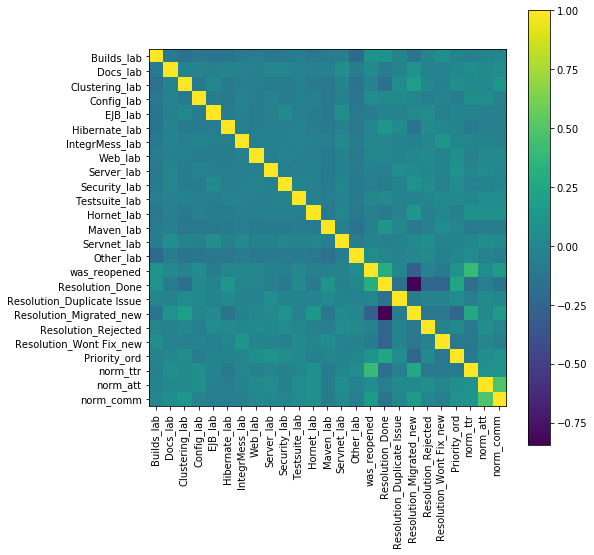

In [73]:
from matplotlib.colors import LinearSegmentedColormap
def corr_heatmap(data):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    corr_ = data.corr(method='pearson')
    ax.set_xticks(numpy.arange(len(list(data))))
    ax.set_yticks(numpy.arange(len(list(data))))
    ax.set_xticklabels(list(data),rotation=90)
    ax.set_yticklabels(list(data))
    im = ax.imshow(corr_)
    plt.colorbar(im)
    return plt.show()


corr_heatmap(clust_data)


<function matplotlib.pyplot.bar(*args, **kwargs)>

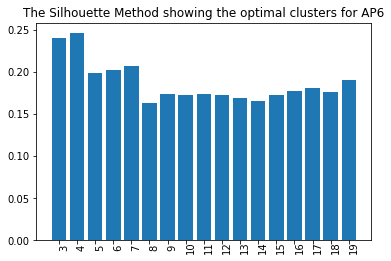

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

def silh_index(data, title):
    silh_ind={}
    for i in range(3,20):
        kmeans=KMeans(n_clusters=i, random_state=42)
        labi=kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data,labi)
        silh_ind.update({i:silhouette_avg})
    plt.figure()
    plt.xticks(range(len(silh_ind)), silh_ind.keys(),rotation=90, rotation_mode='anchor')    
    plt.bar(range(len(silh_ind)), silh_ind.values(), align='center')
    plt.title(title)
    return plt.bar

silh_index(clust_data, 'The Silhouette Method showing the optimal clusters for AP6')


In [15]:
def km_clustering(n,data): 
    headers=list(data)
    zz={}
    km = KMeans(n_clusters=n, random_state=42).fit(data)
    data['cluster_km'] = km.labels_
    zentr=numpy.round(km.cluster_centers_, 3)    

    for i in range(n):
        zrow=zentr[i,:]
        zi=dict(zip(headers, zrow))
        zz.update({i:zi})             
    print(zz) 
    return data

data_km=clust_data[['Builds_lab', 'Docs_lab', 'Clustering_lab', 'Config_lab', 'EJB_lab', 'Hibernate_lab', 'IntegrMess_lab', 'Web_lab', 'Server_lab', 'Security_lab', 'Testsuite_lab', 'Hornet_lab', 'Maven_lab', 'Servnet_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Migrated_new','Resolution_Rejected', 'Resolution_Wont Fix_new', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

d_km=km_clustering(4,data_km)
print (d_km.groupby(['cluster_km']).size())


{0: {'IntegrMess_lab': 0.024, 'EJB_lab': 0.075, 'Clustering_lab': 0.079, 'Web_lab': 0.055, 'norm_ttr': -0.572, 'Security_lab': 0.049, 'Servnet_lab': 0.016, 'Maven_lab': 0.133, 'Docs_lab': 0.014, 'Resolution_Migrated_new': 0.213, 'Hornet_lab': 0.044, 'Builds_lab': 0.205, 'was_reopened': 0.261, 'Other_lab': 0.155, 'Hibernate_lab': 0.081, 'Resolution_Done': 0.692, 'Resolution_Duplicate Issue': 0.014, 'norm_comm': -0.173, 'Server_lab': 0.048, 'Resolution_Rejected': 0.035, 'Priority_ord': 3.13, 'norm_att': -0.222, 'Testsuite_lab': 0.03, 'Config_lab': 0.061, 'Resolution_Wont Fix_new': 0.045}, 1: {'IntegrMess_lab': 0.026, 'EJB_lab': 0.071, 'Clustering_lab': 0.102, 'Web_lab': 0.041, 'norm_ttr': 1.428, 'Security_lab': 0.034, 'Servnet_lab': 0.026, 'Maven_lab': 0.09, 'Docs_lab': 0.053, 'Resolution_Migrated_new': 0.44, 'Hornet_lab': 0.083, 'Builds_lab': 0.154, 'was_reopened': 0.658, 'Other_lab': 0.177, 'Hibernate_lab': 0.045, 'Resolution_Done': 0.553, 'Resolution_Duplicate Issue': -0.0, 'norm_comm

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

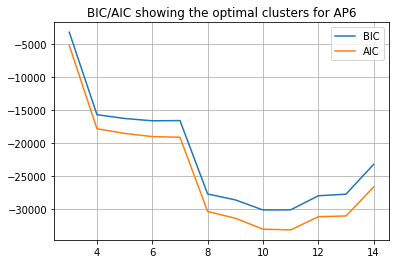

In [12]:
from sklearn.mixture import GaussianMixture


def AIC_BIC(data,title):
    plt.figure()
    n_components = numpy.arange(3, 15)    
    models = [GaussianMixture(n, covariance_type='tied', random_state=0).fit(data)
              for n in n_components]
    plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
    plt.legend() 
    plt.title(title)
    plt.grid(True)
    return plt

AIC_BIC(clust_data,'BIC/AIC showing the optimal clusters for AP6')

In [37]:
def em_clust(data,n):
    gmm = GaussianMixture(n_components=n, covariance_type='tied',random_state=0)
    gmm.fit(data)
    data['cluster_em'] = gmm.predict(data)
    for i in range (n):
        temp=data[data['cluster_em']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())

    return 


clust_data_gmm=clust_data[['Builds_lab', 'Docs_lab', 'Clustering_lab', 'Config_lab', 'EJB_lab', 'Hibernate_lab', 'IntegrMess_lab', 'Web_lab', 'Server_lab', 'Security_lab', 'Testsuite_lab', 'Hornet_lab', 'Maven_lab', 'Servnet_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Migrated_new','Resolution_Rejected', 'Resolution_Wont Fix_new', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

em_clust(clust_data_gmm,11)


Cluster # 0, count: 350
Builds_lab                    0.197143
Docs_lab                      0.002857
Clustering_lab                0.037143
Config_lab                    0.068571
EJB_lab                       0.077143
Hibernate_lab                 0.108571
IntegrMess_lab                0.028571
Web_lab                       0.057143
Server_lab                    0.025714
Security_lab                  0.028571
Testsuite_lab                 0.037143
Hornet_lab                    0.048571
Maven_lab                     0.171429
Servnet_lab                   0.011429
Other_lab                     0.142857
was_reopened                  0.000000
Resolution_Done               0.874286
Resolution_Duplicate Issue    0.000000
Resolution_Migrated_new       0.000000
Resolution_Rejected           0.042857
Resolution_Wont Fix_new       0.082857
Priority_ord                  2.968571
norm_ttr                     -0.693745
norm_att                     -0.111661
norm_comm                    -0.316565
c